In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Data 
Train = pd.read_csv('Train.csv')
data=Train
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 1. Data Exploration 

In [3]:
data.shape

(8523, 12)

This dataset has 8523 observations(rows) and 12 features(columns).


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
 #Finding unique values
data.apply(lambda x :len(x.unique())) 

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
#Extracting column names from the data
col = data.columns
col

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

###  Item_Type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

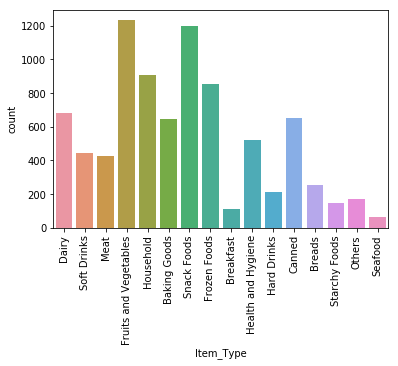

In [8]:
ax=sns.countplot(data.Item_Type)
plt.xticks(rotation=90)

From above plot we can see there are 16 different types of categories available. We should reduce this numbers for our convinience . 

###  Outlet_Size 

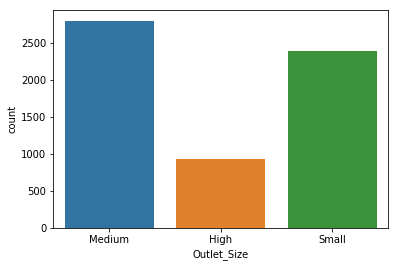

In [9]:
sns.countplot(data.Outlet_Size)

Seems like most of the items are of Medium size. Very few outlets are of large size.

### Item_Fat_Content

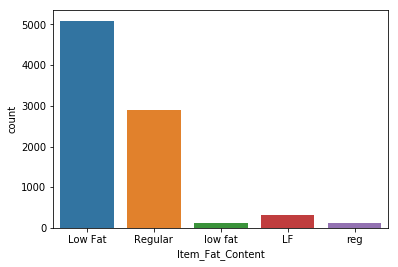

In [10]:
sns.countplot(data.Item_Fat_Content)

So, most of the fat content is either "Low Fat" or "Regular" . Other are the same data categories but are written in different manner. 

### Outlet_Type

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

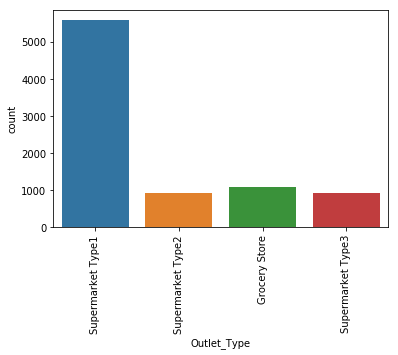

In [11]:
sns.countplot(data.Outlet_Type)
plt.xticks(rotation=90)

Most of the Outlets are of Supermarket Type 1. Other three categories are in almost equal number.

### Outlet_Location_Type

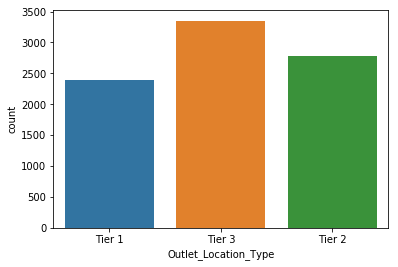

In [12]:
sns.countplot(data.Outlet_Location_Type)

"Tier 3 " Type of outlet location are maximum in number.

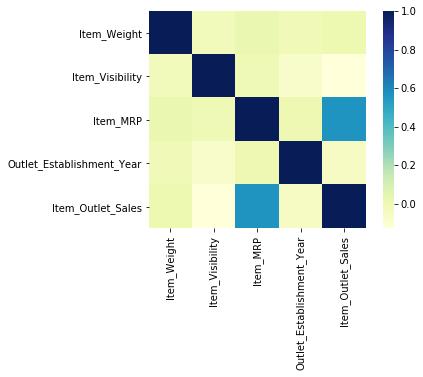

In [13]:
correlation=data.corr()
sns.heatmap(correlation,square=True,cmap="YlGnBu")

From above heatmap we can conclude that "Item_MRP" has highest impact on "Item_Outlet_Sales" whereas "Item_Visibility" has the lowest impact on our target variable. 

## 2. Data Pre-processing 

In [14]:
# To check missing data
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are some missing value in the data as we can see. 1463 values of Item_weight are missing where as 2410 values of Outlet size are not available. 

##### 1. Item_weight

  item_weight can not be zero. so replacing null values with mean value

In [15]:
data[col[1]].fillna(value=data[col[1]].mean(),inplace=True)

##### 2. Outlet_Size 

In [16]:
data[col[8]].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


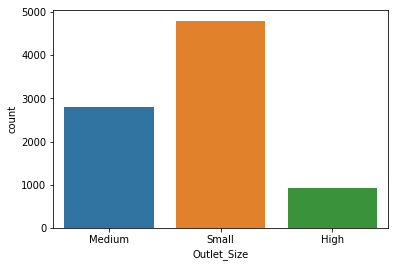

In [18]:
def Outlet_Size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
    

data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(Outlet_Size_mode,axis=1)

#Visualization 
sns.countplot(data.Outlet_Size)

# Mapping the data
data['Outlet_Size']=data['Outlet_Size'].map({'Small':3,'Medium':2,'High':1})

In [19]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

###### Mode Function: 
    The mode of a set of data values is the value that appears most often. It is the value at which the data is most likely to be sampled. 

Before data pre-processing "Medium" size outlets were in highest number. But after imputing the missing values we can see that small size outlets are now more in number.

##### 3.  Item_Visibility

At some places Item_visibility is zero . Practically it can not be zero . so replacing  those values by average value which is 0.065953

In [20]:
# Item Visibility
data=data.replace({'Item_Visibility': {0: 0.065953}})


#####  4. Outlet_Years

Imputing outlet's years since it was established and also dropping establishment year column from the data.

In [21]:
data['Outlet_Years'] = 2019 - data.Outlet_Establishment_Year
data.drop('Outlet_Establishment_Year',axis=1,inplace=True)

##### 5. Item_Fat_Content


There are only two categories of fat content 
-  Low fat
-  Regular

These categories are repeated.They must be renamed. 

In [22]:
data['Item_Fat_Content']=data['Item_Fat_Content'].map({'Low Fat':'Low Fat','Regular':'Regular','low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})
data[col[2]].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##### 6.Item_Type

There are 16 different categories of Item_Type. So it must be mapped for convinience purpose.

In [23]:
# grouping Item types 

# taking 1st two letters from Item_Identifier code
data['Item_Type']=data["Item_Identifier"].apply(lambda x:x[0:2])


data['Item_Type']=data['Item_Type'].map({"FD":"Food","DR":"Drinks","NC":"Non-consumable Products"})

data['Item_Type'].value_counts()

Food                       6125
Non-consumable Products    1599
Drinks                      799
Name: Item_Type, dtype: int64

####  Checking effect of different variables on our target variable i.e. "Item_Outlet_sales":

#####  a. Item_Fat_Content

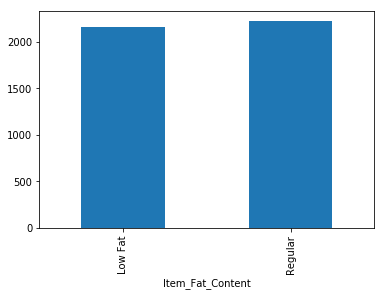

In [24]:
data.groupby("Item_Fat_Content")['Item_Outlet_Sales'].mean().plot(kind='bar')


Seems like Item_Fat_Content has nearly no effect on Item_Outlet_Sales

##### b. Item_Outlet_Sales

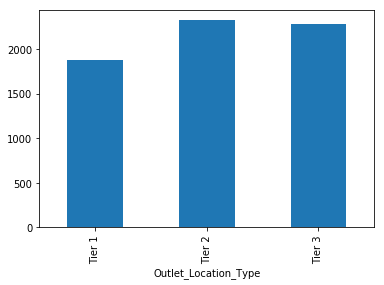

In [25]:
data.groupby("Outlet_Location_Type")['Item_Outlet_Sales'].mean().plot(kind='bar')


Tier_2 Outlet_location_type has more sales followed by Tier_3 and Tier_1 .

##### c. Item_Visibility

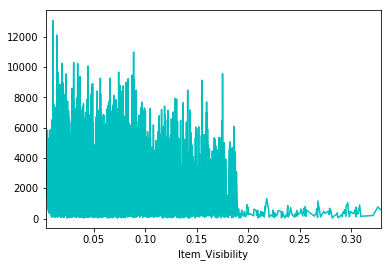

In [26]:
data.groupby("Item_Visibility")['Item_Outlet_Sales'].mean().plot(kind='line',color="c")

So from above plot we can conclude that less the visibility higher the sales.

##### d. Item_Visibility

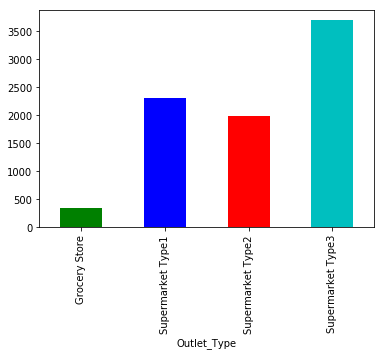

In [27]:
data.groupby("Outlet_Type")['Item_Outlet_Sales'].mean().plot(kind='bar',color=["g", "b","r","c"])

Supermarket_Type_3 has observed highest number of sales where as grocery store has lowest number of sales.

##### e. Outlet_Years

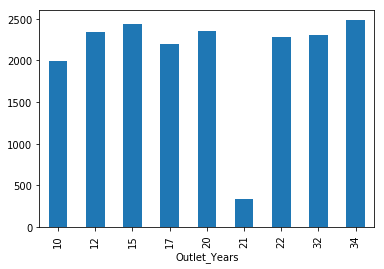

In [28]:
data.groupby("Outlet_Years")['Item_Outlet_Sales'].mean().plot(kind='bar')

Item_Outlet_Sales is not dependable on Outlet_Years.

##### f. Item_Type

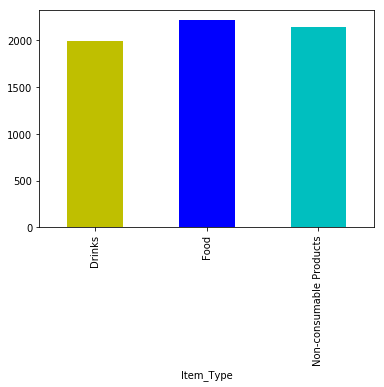

In [29]:
data.groupby("Item_Type")['Item_Outlet_Sales'].mean().plot(kind='bar',color=["y", "b","c"])

##### g. Item_Type

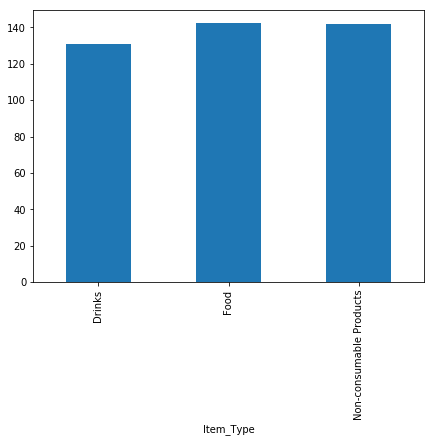

In [30]:
data.groupby("Item_Type")['Item_MRP'].mean().plot(kind='bar',figsize=(7,5))

##### h. Item_Weight

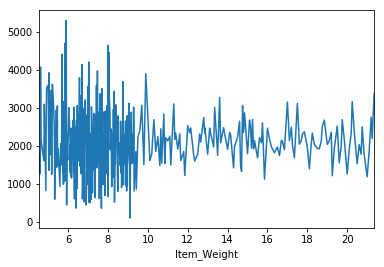

In [31]:
data.groupby("Item_Weight")['Item_Outlet_Sales'].mean().plot(kind='line')

In [32]:
data.isnull().sum() # to check if there is any missisng data

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_Years            0
dtype: int64

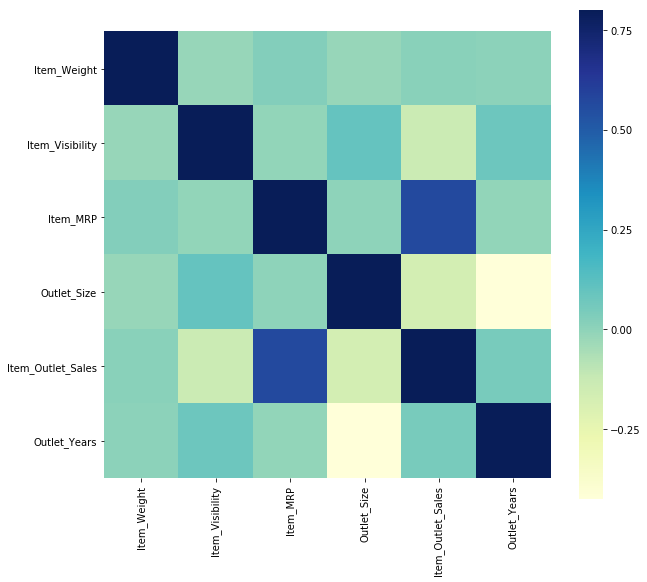

In [33]:
correl=data.corr()
ax=plt.subplots(figsize=(10,9))
sns.heatmap(correl,vmax=0.8,square=True ,cmap="YlGnBu")
#, cmap="YlGnBu"

From above heatmap we can conclude that Item_MRP has impact on Outlet_Sales followed by Item_Visibility . Whereas Outlet_Size has little impact on Item_Outlet_Sales. 

##  3. Feature Engineering

### Label Encoding 
Label Encoding refers to converting the labels into numeric format to convert it into the machine-readable form. ML algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
data['Outlet']=le.fit_transform(data['Outlet_Identifier'])
variable = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type','Outlet']
for i in variable:
    data[i] = le.fit_transform(data[i])

### One Hot Encoding 
One hot encoding will create dummies for each category of variable. It will create columns with binary values i.e 0 or 1 .

In [36]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type','Outlet'])

In [37]:
data.drop(['Item_Identifier'],axis=1,inplace=True)
data.drop(['Outlet_Identifier'],axis=1,inplace=True)


In [38]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,3735.1380,20,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,10,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,20,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.065953,182.0950,732.3800,21,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.065953,53.8614,994.7052,32,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


Now data seems ready for processing. Thus creating two variables X and y. X will contain all above data except target variable i.e Item_Outlet_Sales and y hold value of target variable . 

In [39]:
# divide dataset into x & y
X = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']].values 

X

array([[9.30000000e+00, 1.60473010e-02, 2.49809200e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.92000000e+00, 1.92782160e-02, 4.82692000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.75000000e+01, 1.67600750e-02, 1.41618000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.06000000e+01, 3.51862710e-02, 8.51224000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.21000000e+00, 1.45220646e-01, 1.03133200e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.48000000e+01, 4.48782800e-02, 7.54670000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [40]:
# print Target in array format
y = data.iloc[:, 3].values
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [41]:
col = data.columns
cols = data.columns.drop(['Item_Outlet_Sales'])

#### train_test_split
scikit-learn provides a helpful function for partitioning data, train_test_split, which splits out your data into a training set and a test set.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.17, random_state = 0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7074, 29) (7074,)
(1449, 29) (1449,)


## 4. Creating Model

#### 1. Linear Regression Model 

It is a linear approach to modelling the relationship between dependent variable and one or more explanatory variables. 

In [43]:
# Fitting Simple Linear Regression to the Training set for classifier
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
accuracy_lr = regressor.score(X_train,y_train) * 100
accuracy_lr

56.41280456836968

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_1= sqrt(mean_squared_error(y_test, y_pred))
rms_1

1137.4487047170812

#### Root Mean Squared Error (RMSE):
It measures the square root of the average of the squared difference between the predictions and the ground truth. Since the RMSE is squaring the difference between the predictions and the ground truth, any significant difference is made more substantial when it is being squared. Moreover, RMSE is more sensitive to outliers.

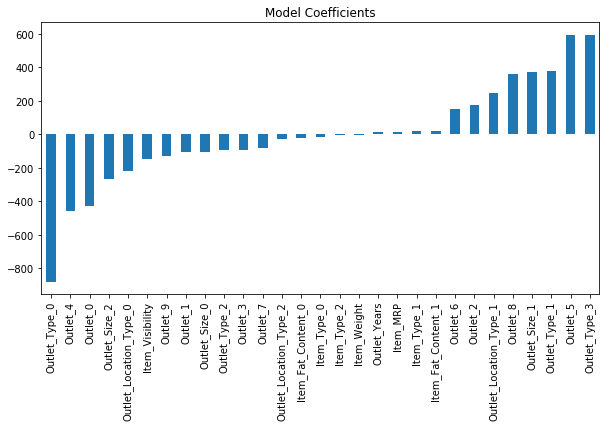

In [46]:
plot_1 = pd.Series(regressor.coef_ ,cols).sort_values()
plot_1.plot(kind='bar', title='Model Coefficients' , figsize=(10,5))

#### Random Forest  Model

In [47]:
from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor(n_estimators=500,max_depth=5, min_samples_leaf=50,n_jobs=4,random_state=42)
random.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=4,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [48]:
random_pred = random.predict(X_test)
random_accuracy = round(random.score(X_train,y_train)*100,4)
random_accuracy


61.0539

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_2 = sqrt(mean_squared_error(y_test, random_pred))
rms_2

1101.211400689388

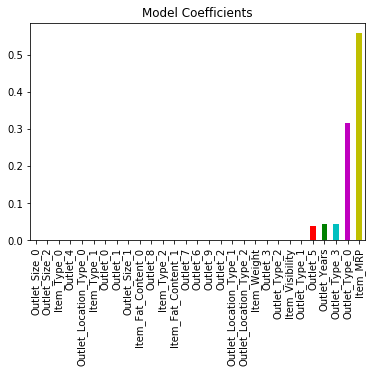

In [50]:
plot_2 = pd.Series(random.feature_importances_, cols).sort_values()
plot_2.plot(kind='bar', title='Model Coefficients',color=['r','g','c','m','y','k'])

### Decision Tree Model

In [51]:
from sklearn.tree import DecisionTreeRegressor 

Decision_tree = DecisionTreeRegressor(max_depth=20,min_samples_leaf=120)
Decision_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=120,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [52]:
dt_predict = Decision_tree.predict(X_test)
DT_accuracy = round(Decision_tree.score(X_train,y_train)*100,4)
DT_accuracy

61.1519

In [53]:
rms_3 = sqrt(mean_squared_error(y_test, dt_predict))
rms_3

1105.106481122638

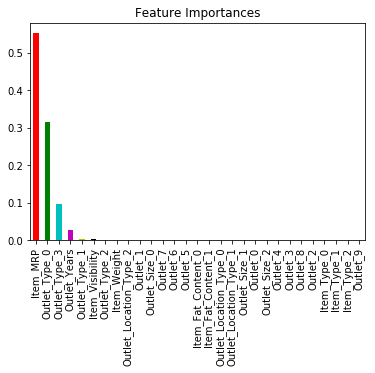

In [54]:
plot_3 = pd.Series(Decision_tree.feature_importances_, cols).sort_values(ascending=False)
plot_3.plot(kind='bar', title='Feature Importances',color=['r','g','c','m','y','k'])

### Gradient Boosting Regressor

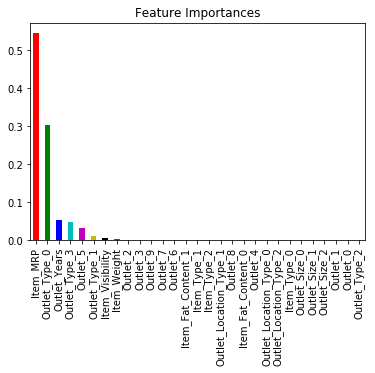

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

alg= GradientBoostingRegressor(n_estimators= 50, learning_rate= 0.1, max_depth= 3)
alg.fit(X_train,y_train)
plot_4 = pd.Series(alg.feature_importances_, cols).sort_values(ascending=False)
plot_4.plot(kind='bar', title='Feature Importances',color=['r','g','b','c','m','y','k'])

In [56]:
predict = alg.predict(X_test)
p_accuracy = round(alg.score(X_train,y_train)*100,4)
p_accuracy

62.1855

In [57]:
rms_4 = sqrt(mean_squared_error(y_test, predict))
rms_4

1095.2479040434328

In [61]:
from sklearn.externals import joblib 
joblib.dump(alg, 'GBR.pkl') #Save the model


['GBR.pkl']

## 5. Conclusion

In [62]:
print("The accuracy of :")
print("Linnear Regression Model :", accuracy_lr)
print("Random Forest Model :",random_accuracy)
print("Decision Tree Model :",DT_accuracy)
print("Gradient Boosting Regressor Model :",p_accuracy)


The accuracy of :
Linnear Regression Model : 56.41280456836968
Random Forest Model : 61.0539
Decision Tree Model : 61.1519
Gradient Boosting Regressor Model : 62.1855


In [63]:
print("The RMSE of :") 
print("Linnear Regression Model :", rms_1)
print("Random Forest Model :", rms_2)
print("Decision Tree Model :", rms_3)
print("Gradient Boosting Regressor Model:", rms_4)


The RMSE of :
Linnear Regression Model : 1137.4487047170812
Random Forest Model : 1101.211400689388
Decision Tree Model : 1105.106481122638
Gradient Boosting Regressor Model: 1095.2479040434328


 Gradient Boosting Regressor Model gave highest accuracy with least RMSE i.e 1095. So it can be used for evaluation purpose.

I have created the predictive models that allowed me to have a better understanding of the client’s behavior and an estimation of the store’s future sales. It turned out that customers tend to prefer a product with a high MRP because the negotiation margin is bigger and because a high price tends to be associated with a better quality. Also, I concluded that the outlet type and Outlet location influences the volume of sales.